In [11]:
from SVDModel import SVDModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(3362)
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [12]:
# MovieLens Small
data_path_ml_small = './data/ml-latest-small/'
df_rating_ml_small = pd.read_csv(data_path_ml_small+'ratings.csv')
df_movies_ml_small = pd.read_csv(data_path_ml_small+'movies.csv')
m_movies_ml_small = df_movies_ml_small['movieId'].nunique()
n_users_ml_small = df_rating_ml_small['userId'].nunique()
n_ratings_ml_small = len(df_rating_ml_small)

df_movies_ml_small.insert(1, 'newMovieId', value=range(1,len(df_movies_ml_small)+1))
newMovieIdDict = {}
for index, movie in df_movies_ml_small.iterrows():
  newMovieIdDict[movie['movieId']] = movie['newMovieId']
df_rating_ml_small.replace({"movieId": newMovieIdDict}, inplace=True)
df_rating_ml_small['rating'] = df_rating_ml_small['rating'].astype(np.int64)

# print(df_rating_ml_small)
# print(df_movies_ml_small)
# print(n_users_ml_small)
# print(n_ratings_ml_small)
# print(m_movies_ml_small)

In [ ]:
# Netflix Prize
data_path_netflix = './data/NetflixPrize/'
names = ['userId','rating','timestamp','movieId']
df_netflix = pd.read_csv(data_path_netflix+'data_1.txt', names=names, low_memory=False)
# df_netflix_2 = pd.read_csv(data_path_netflix+'data_2.txt', names=names, low_memory=False)
# df_netflix_3 = pd.read_csv(data_path_netflix+'data_3.txt', names=names, low_memory=False)
# df_netflix_4 = pd.read_csv(data_path_netflix+'data_4.txt', names=names, low_memory=False)
# df_netflix = pd.concat([df_netflix,df_netflix_2,df_netflix_3,df_netflix_4], names=names)
df_netflix['movieId'] = df_netflix['movieId'].fillna(method='ffill')
df_netflix = df_netflix.dropna()
df_netflix['rating'] = df_netflix['rating'].astype(np.int64)
df_netflix['movieId'] = df_netflix['movieId'].astype(np.int64)
df_netflix['userId'] = df_netflix['userId'].astype(np.int64)
df_netflix['timestamp'] = pd.to_datetime(df_netflix['timestamp']).view(dtype=np.int64) // 10 ** 9
# df_movies_netflix = pd.read_csv(data_path_netflix+'movie_titles.csv',encoding='latin-1',names=['movieId','release_year','title',])
m_movies_netflix = df_netflix['movieId'].nunique()
# m_movies_netflix = df_netflix['movieId'].max()
n_users_netflix = df_netflix['userId'].nunique()
# n_users_netflix = df_netflix['userId'].max()
n_ratings_netflix = len(df_netflix)
df_rating_netflix = df_netflix[['userId','movieId','rating','timestamp']].sample(10000)


# print(df_netflix_rating)
# print(df_netflix_movies)
# print(n_users_netflix)
# print(n_ratings_netflix)
# print(m_movies_netflix)

In [ ]:
features = 3
lr = 0.001
epochs = 101
weight_decay = 0.02
stopping = 0.001

svd_ml_small = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)
svd_netflix = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)


In [ ]:
svd_ml_small.data_loader(data=df_rating_ml_small, n_items = m_movies_ml_small, n_users=n_users_ml_small)
svd_ml_small.split(0.6,0.8)

User Item Matrix Shape: (610, 9742)
User Reference length: 610
Item Reference length: 9742


In [ ]:
svd_netflix.data_loader(data=df_rating_netflix, n_items = m_movies_netflix, n_users=n_users_netflix)
svd_netflix.split(0.6,0.8)

User Item Matrix Shape: (9667, 4499)
User Reference length: 9667
Item Reference length: 4499


In [ ]:
results_ml_small = svd_ml_small.training()

Epoch :    1  | Train : 12.457  | Valid : 12.453
Epoch :   11  | Train : 7.235  | Valid : 7.563
Epoch :   21  | Train : 3.131  | Valid : 3.636
Epoch :   31  | Train : 1.960  | Valid : 2.542
Epoch :   41  | Train : 1.457  | Valid : 2.081
Epoch :   51  | Train : 1.186  | Valid : 1.835
Epoch :   61  | Train : 1.020  | Valid : 1.685
Epoch :   71  | Train : 0.909  | Valid : 1.586
Epoch :   81  | Train : 0.832  | Valid : 1.518
Epoch :   91  | Train : 0.776  | Valid : 1.468
Epoch :  101  | Train : 0.734  | Valid : 1.432
Training stopped:
Epoch :  101  | Train : 0.734  | Valid : 1.432


In [ ]:
resuls_netflix = svd_netflix.training()

Epoch :    1  | Train : 13.963  | Valid : 13.976
Epoch :   11  | Train : 13.932  | Valid : 13.953
Epoch :   21  | Train : 13.893  | Valid : 13.929
Epoch :   31  | Train : 13.840  | Valid : 13.902
Epoch :   41  | Train : 13.768  | Valid : 13.871
Epoch :   51  | Train : 13.666  | Valid : 13.837
Epoch :   61  | Train : 13.522  | Valid : 13.797
Epoch :   71  | Train : 13.321  | Valid : 13.751
Epoch :   81  | Train : 13.047  | Valid : 13.698
Epoch :   91  | Train : 12.691  | Valid : 13.638
Epoch :  101  | Train : 12.253  | Valid : 13.573
Training stopped:
Epoch :  101  | Train : 12.253  | Valid : 13.573


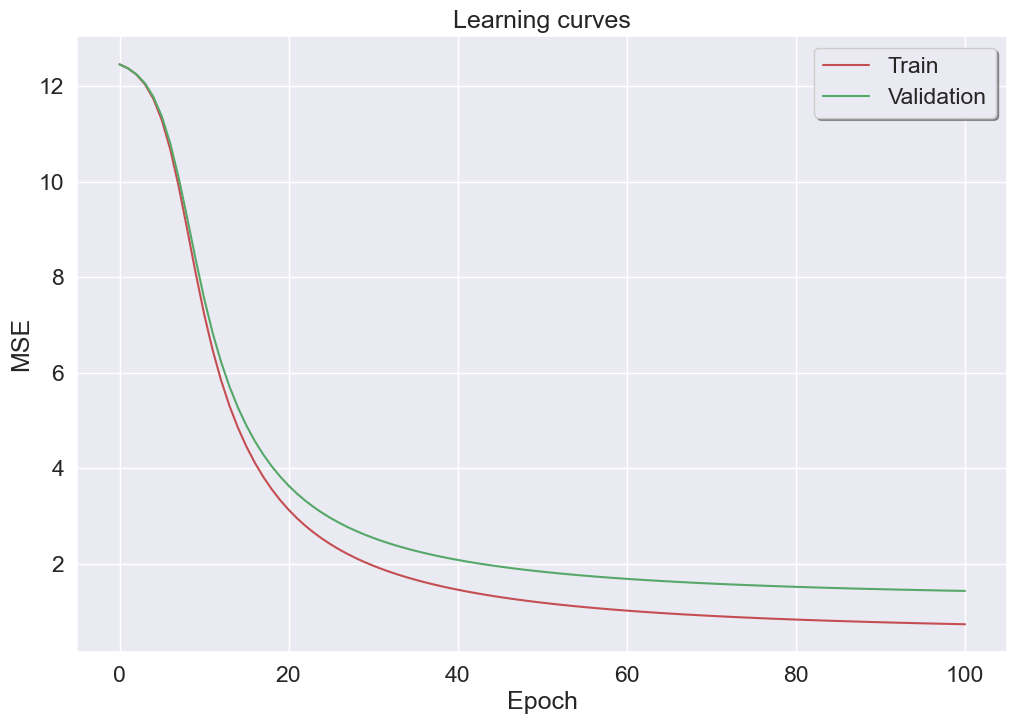

In [ ]:
x = list(range(len(results_ml_small[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], results_ml_small[0][-k:], 'r', label="Train")
plt.plot(x[-k:], results_ml_small[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

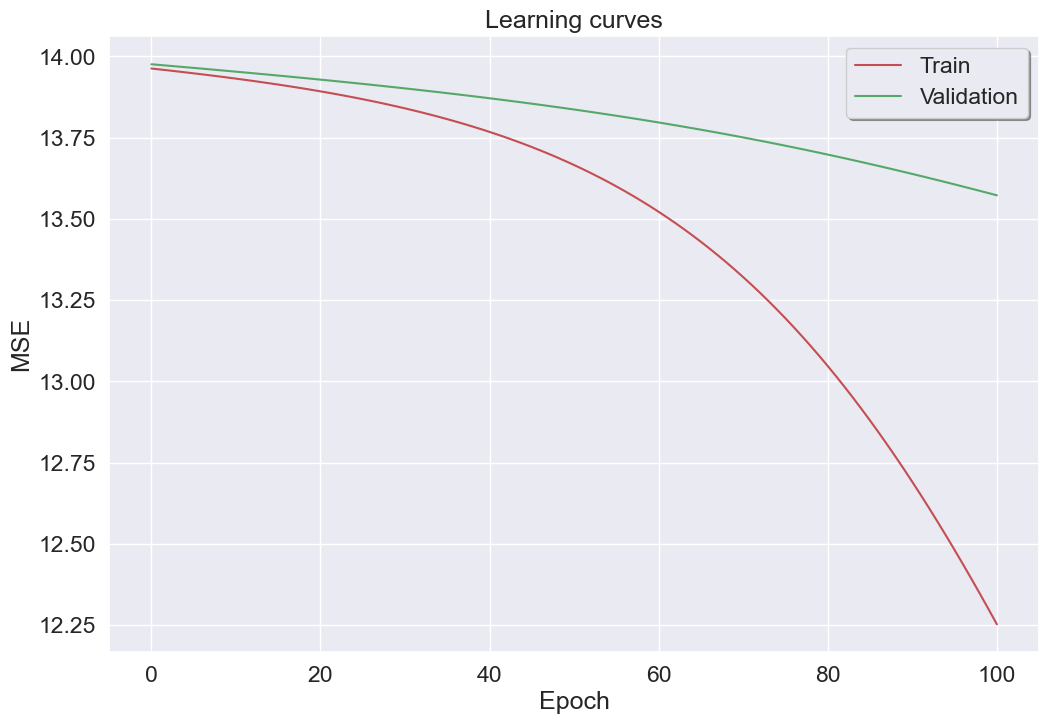

In [ ]:
x = list(range(len(resuls_netflix[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], resuls_netflix[0][-k:], 'r', label="Train")
plt.plot(x[-k:], resuls_netflix[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

In [ ]:
svd_ml_small.data.info()

In [ ]:
svd_netflix.data.info()